In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
# from subprocess import check_output
# print(check_output(["dir"]).decode("utf8"))
%matplotlib inline

In [2]:
train_data=pd.read_csv("data/train.csv")
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(Counter(train_data["label"]))

Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


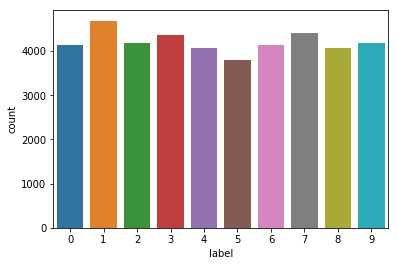

In [4]:
sns.countplot(train_data["label"])

In [5]:
test_data=pd.read_csv("data/test.csv")

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train=train_data.values[:,1:]
y_train=train_data.values[:,0]
x_test =test_data.values

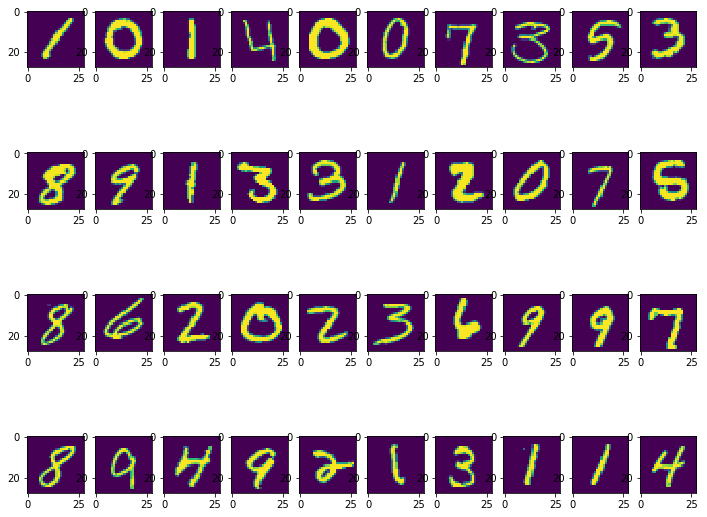

In [8]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)))
plt.show()

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [12]:
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

##### Convert to one-hot

In [13]:
Y_train = keras.utils.to_categorical(y_train, num_classes)

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [15]:
model=Sequential()

In [16]:
#1
model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(keras.layers.Activation(keras.activations.relu))
#2
# model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal()))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Activation(keras.activations.relu))
# model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal()))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Activation(keras.activations.relu))
# model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal()))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Activation(keras.activations.relu))

#5
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
#7
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Activation(keras.activations.relu))
#8
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Activation(keras.activations.relu))
# model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal()))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Activation(keras.activations.relu))

#10
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
#11
model.add(Conv2D(filters=128, kernel_size=(1,1), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
#12
model.add(Conv2D(filters=128, kernel_size=(1,1), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Activation(keras.activations.relu))
#13
model.add(Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=keras.initializers.glorot_normal(), padding='same'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Activation(keras.activations.relu))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       147584    
__________

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)
datagen.fit(X_train)

In [25]:
h=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                      validation_data=(X_val, Y_val),
                      steps_per_epoch=len(x_train) / 64, 
                      epochs=15)

Epoch 1/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0280 - val_acc: 0.9924
Epoch 2/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0207 - acc: 0.9932 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 3/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0197 - acc: 0.9937 - val_loss: 0.0273 - val_acc: 0.9926
Epoch 4/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0187 - val_acc: 0.9938
Epoch 5/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0176 - acc: 0.9947 - val_loss: 0.0432 - val_acc: 0.9910
Epoch 6/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0205 - acc: 0.9937 - val_loss: 0.0186 - val_acc: 0.9940
Epoch 7/15
657/656 [==============================] - 52s 79ms/step - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0265 - val_acc: 0.9924
Epoch 8/15
657/656 [==============================] - 52s 79ms

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
early_stopping=keras.callbacks.EarlyStopping()

In [21]:
# h=model.fit(X_train, Y_train, batch_size=64, validation_split=0.1, epochs=1, callbacks=[learning_rate_reduction])

Train on 37800 samples, validate on 4200 samples
Epoch 1/1
37800/37800 [==============================] - 48s 1ms/step - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0889 - val_acc: 0.9702


In [45]:
# final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
# print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.042086, final accuracy: 0.985952


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


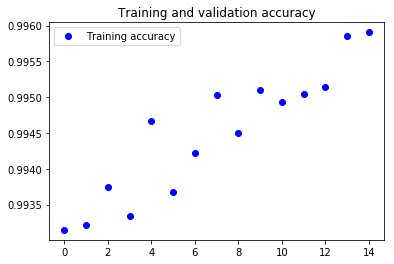

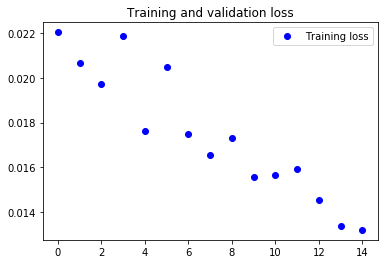

In [26]:
print(h.history.keys())
accuracy = h.history['acc']
# val_accuracy = h.history['val_acc']
loss = h.history['loss']
# val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
accuracy

[0.9379164287300988,
 0.9781553397944784,
 0.9839853417094994,
 0.9859366076754634,
 0.9866266895107557,
 0.987602322482391,
 0.9892204454483905,
 0.9896487721302113,
 0.9899285714285714,
 0.9905292213972968,
 0.9911955073291453,
 0.9919093851132686,
 0.9917190177268627,
 0.9927660384542166,
 0.9926946506758043]

In [27]:
p=model.predict(X_test)

In [28]:
predicted_classes=p
# y_true = test_data.iloc[:, 0]
# correct = np.nonzero(predicted_classes==y_true)[0]
# incorrect = np.nonzero(predicted_classes!=y_true)[0]
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": [np.argmax(predicted_classes[i]) for i in range(len(predicted_classes))]})
submissions.to_csv("asd.csv", index=False, header=True)